Notebook Link: https://tinyurl.com/pds-clustering

# Types of Clustering
---
1. Hard Clustering
2. Soft Clustering


| Feature           | Hard Clustering          | Soft Clustering          |
|------------------|------------------------|------------------------|
| **Membership Assignment** | Each data point belongs to one cluster. | Each data point can belong to multiple clusters with probabilities. |
| **Examples** | K-Means, DBSCAN | Gaussian Mixture Model (GMM), Fuzzy C-Means |
| **Interpretability** | Easy to interpret due to distinct clusters. | Harder to interpret as points belong to multiple clusters. |
| **Use Cases** | Suitable for well-separated data groups. | Useful when clusters have overlapping properties. |


> Add blockquote



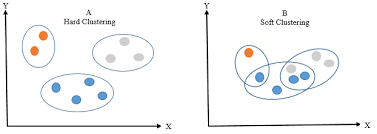

**Terms that influence clustering**

---
Graphing, The shortest distance, density of the data points
- Metric: `Similarity Measure`


Types of Clustering based on clustering technique

---
1. Centroid-based Clustering (Partitioning methods)
2. Density-based Clustering (Model-based methods)
3. Connectivity-based Clustering (Hierarchical clustering)


Centroid Based Clustering

---
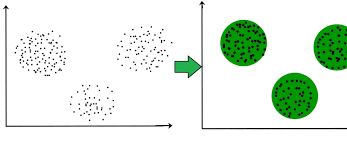

Density-Based Clustering

---
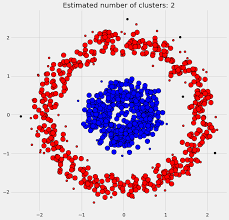

Connectivity-Based Clustering

---
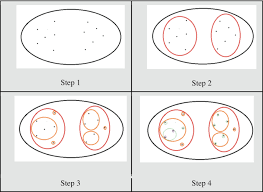

# Centroid Based Clustering Details

- **Popular Algorithms:** K-Means, K-Medoids
- **Similarity Measurement:** Euclidean distance, Manhattan Distance or Minkowski Distance
- **Drawback:** Determining K value (number of clusters) initially.

## Euclidean Distance
The Euclidean distance between two points p and q in n-dimensional space is calculated as:

$$d(p, q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}$$

where:
-  $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$ are the two points in n-dimensional space.
- $q_i$ and $p_i$ are the coordinates of the points p and q in the i-th dimension.



## Manhattan Distance
The Manhattan distance between two points p and q in n-dimensional space is calculated as:

$$d(p, q) = \sum_{i=1}^{n} |q_i - p_i|$$

where:
- $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$ are the two points in n-dimensional space.
- $q_i$ and $p_i$ are the coordinates of the points p and q in the i-th dimension.



## Minkowski Distance
The Minkowski distance is a generalization of both the Euclidean and Manhattan distances. It is calculated as:

$$d(p, q) = (\sum_{i=1}^{n} |q_i - p_i|^r)^{\frac{1}{r}}$$

where:
- $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$ are the two points in n-dimensional space.
- $q_i$ and $p_i$ are the coordinates of the points p and q in the i-th dimension.
- $r$ is the order of the Minkowski distance. When $r = 1$, the Minkowski distance is equivalent to the Manhattan distance. When $r = 2$, the Minkowski distance is equivalent to the Euclidean distance.

# K-Means Clustering
- For details, checkout to this blog: https://www.geeksforgeeks.org/k-means-clustering-introduction/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/DharmarajPi/K-Means-Clustering/refs/heads/main/Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
X = customer_data.drop(columns=['CustomerID','Gender','Age'], axis=1).values
# X is a numpy array here

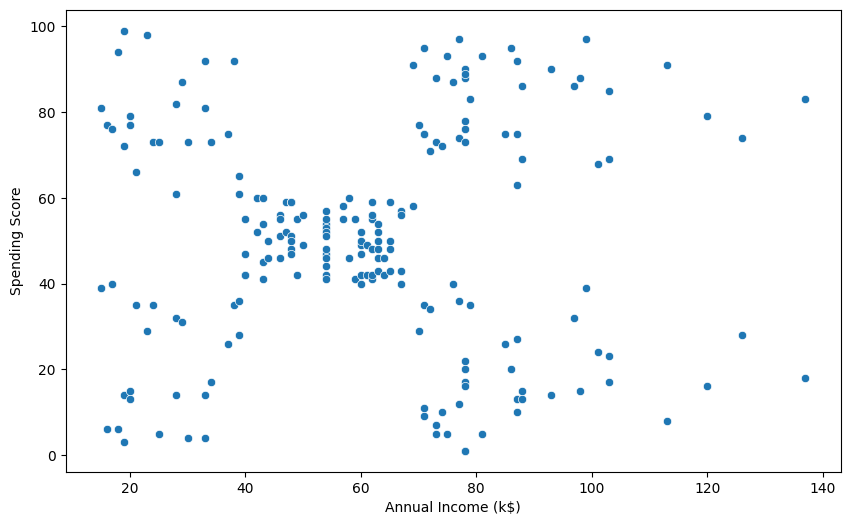

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

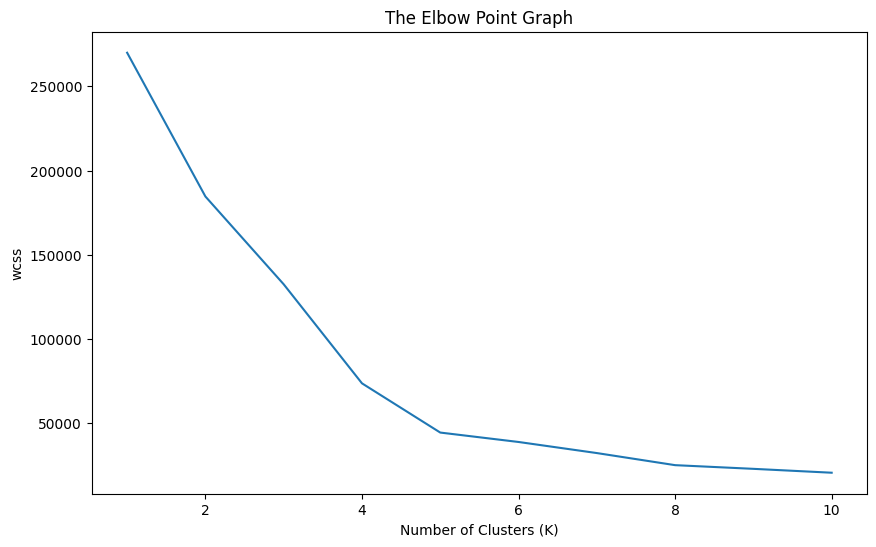

In [8]:
# Find the K value using the Elbow method
# WCSS (Within-Cluster Sum of Squares)

wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

In [14]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

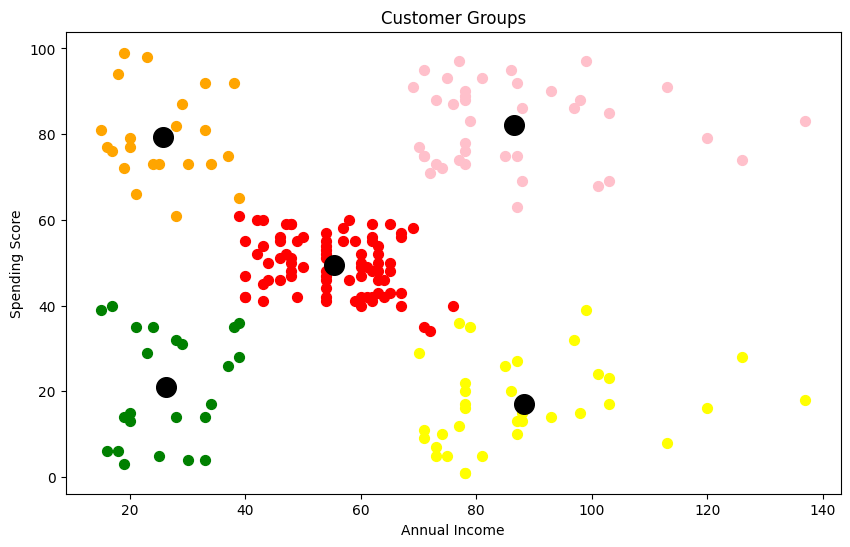

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Density Based Clustering (DBSCAN)

DBSCAN: Density-based spatial clustering of applications with noise

Key Features:
- Can find arbitrarily shaped clusters
- Handles noise and outliers well
- Excels with clusters of different sizes and shapes
- Ideal for datasets with irregularly shaped or overlapping clusters
- Effectively manages both dense and sparse data regions
- Focus on local density allows detection of various cluster morphologies


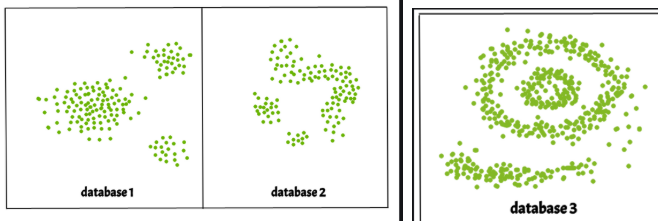

- eps = the radius
- MinPts >= D+1 and MinPts >= 3

For good visuals, visit: https://www.youtube.com/watch?v=RDZUdRSDOok

If anyone wants to use DBSCAN training on real data, follow this notebook:
https://drive.google.com/file/d/16oFJ6Wd_gA6u7VCIIek7LR3RzIFn4UeN/view?usp=sharing